# Clustering
FIRA 빅데이터 플랫폼 과정 <데이터마이닝> - 2017.08.14.월 14:00-18:00

### 1. Data : 21.6 
- 1-1. `BathSoap.xlsx`
- 1-2. Data Load : `pd.read_xlsx`
- 1-3. Join Table : `pd.merge`
- 1-4. Delete Rows & Columns

### 2. Hierarchical Clustering 
- 2-1. `sklearn.cluster.AgglomerativeClustering`
- 2-2. Clustering with Dendrogram : `scipy.cluster.hierarchy`

### 3. K-means
- 3-1. `sklearn.cluster.KMeans`

### 4. Analysis 
- 4-1. Choose K : Using Silhouette Plot
- 4-2. .groupby()

### 5. 실습 : 비누 판매 마케팅 전략 수립을 위한 데이터 분석
- 5-1. More Preprocessing
- 5-2. 비누 구매 고객 세분화
- 5-3. 타겟 클러스터 선정 및 마케팅 기획

### 1. Data
---
- 1-1. `BathSoap.xlsx`
- 1-2. Data Load : `pd.read_xlsx`
- 1-3. Join Table : `pd.merge`
- 1-4. Delete Rows & Columns

#### 1-1.  `BathSoap.xlsx`
---
- sheet3 : DM_Sheet, 멤버 정보 및 비누 구입 정보
- sheet4 : Durables, 멤버들의 비누 이외 타물품 소유 정보
---
비누를 구매한 고객들의 데이터를 토대로 군집화를 이용하여 효과적인 마케팅 전략을 수립하려고 한다. 총 600개의 표본을 각종 변수를 고려하여 치밀하게 표집하였다. 주어진 데이터는 각종 인구통계자료, 내구재 소유 자료, 제품의 카테고리와 각 브랜드에 대한 구매 데이터이다.

*Q. 군집화는 마케팅 전략을 세우는데 어떤 역할을 할 수 있는가?*

#### 1-2. Data Load : `pd.read_excel`
---
`BathSoap.xlsx` 파일에서 데이터가 있는 sheet를 DataFrame으로 변환
* pd.read_excel document 참고
* sheet 위치, header로 쓸 row를 잘 지정할 것
* row의 시작은 0

In [24]:
# import packages
import pandas as pd

In [25]:
# df
df = pd.read_excel('BathSoap.xlsx', 2, header=2)

In [44]:
# durable_df
durable_df = pd.read_excel('BathSoap.xlsx', 3, header=4)[:600]

#### 1-3. Join Table : `pd.merge`
---
DM_Sheet와 Durables의 DataFrame을 통합
* 'Member id', 'MEM'을 기준으로 통합, Inner Join

In [45]:
# merged_df & set_index
merged_df = df.merge(durable_df, how="inner", left_on='Member id', right_on='MEM').set_index('Member id')

#### 1-4. Delete Rows & Columns
---
* Delete Rows : 결측치가 있는 행은 지울 것
* Delete Columns : 겹치거나 문제가 있는 열을 지울 것

In [46]:
# Delete Rows : no_nan_df 
no_nan_df = merged_df[merged_df.isnull().sum(axis=1) == 0]

In [47]:
# See the data (to find errorsome columns)
no_nan_df

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,...,Personal/Home Computers,Computer Printers,Fax Machine,Video camera/Handycam,Radio Clock,Deep Freezer,Electirc Kettle,Dish Washing Machine,Kitchen Sink,Floor Polisher
Member id,,,,,,,,,,,,,,,,,,,,,
1010010.0,4.0,3.0,10.0,1.0,4.0,4.0,2.0,4.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1010020.0,3.0,2.0,10.0,2.0,2.0,4.0,4.0,2.0,1.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1014020.0,2.0,3.0,10.0,2.0,4.0,5.0,6.0,4.0,1.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1014030.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1014190.0,4.0,1.0,10.0,2.0,3.0,4.0,4.0,3.0,1.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017020.0,4.0,3.0,10.0,2.0,3.0,4.0,5.0,2.0,1.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017110.0,4.0,2.0,10.0,2.0,4.0,1.0,3.0,2.0,1.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017160.0,4.0,3.0,10.0,2.0,2.0,4.0,5.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017360.0,4.0,3.0,10.0,2.0,4.0,4.0,6.0,4.0,1.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# See only column names
list(no_nan_df.columns)

['SEC',
 'FEH',
 'MT',
 'SEX',
 'AGE',
 'EDU',
 'HS',
 'CHILD',
 'CS',
 'Affluence Index',
 'No. of Brands',
 'Brand Runs',
 'Total Volume',
 'No. of  Trans',
 'Value',
 'Trans / Brand Runs',
 'Vol/Tran',
 'Avg. Price ',
 'Pur Vol No Promo - %',
 'Pur Vol Promo 6 %',
 'Pur Vol Other Promo %',
 'Br. Cd. 57, 144',
 'Br. Cd. 55',
 'Br. Cd. 272',
 'Br. Cd. 286',
 'Br. Cd. 24',
 'Br. Cd. 481',
 'Br. Cd. 352',
 'Br. Cd. 5',
 'Others 999',
 'Pr Cat 1',
 'Pr Cat 2',
 'Pr Cat 3',
 'Pr Cat 4',
 'PropCat 5',
 'PropCat 6',
 'PropCat 7',
 'PropCat 8',
 'PropCat 9',
 'PropCat 10',
 'PropCat 11',
 'PropCat 12',
 'PropCat 13',
 'PropCat 14',
 'PropCat 15',
 'MEM',
 'Unnamed: 1',
 'Radio/Transistor with FM',
 'Radio/Transistor without FM',
 'Stereo/Mono Tape Recorder',
 'Two-in-one',
 'Hi-Fi System/Music System without Compact disk',
 'Hi-Fi System/Music System with Comapct disk',
 'Walkman with FM',
 'Walkman without FM',
 'Discman with FM',
 'Discman without FM',
 'Video (VCP/VCR)',
 'Laser Discs VCD

In [49]:
# Delete columns : X_df
# Choose columns to delete
want_to_del_cols = ['MEM', 'Unnamed: 1']
# Drop columns
X_df = no_nan_df.drop(want_to_del_cols, axis=1)
# See if they are removed
list(X_df.columns)

['SEC',
 'FEH',
 'MT',
 'SEX',
 'AGE',
 'EDU',
 'HS',
 'CHILD',
 'CS',
 'Affluence Index',
 'No. of Brands',
 'Brand Runs',
 'Total Volume',
 'No. of  Trans',
 'Value',
 'Trans / Brand Runs',
 'Vol/Tran',
 'Avg. Price ',
 'Pur Vol No Promo - %',
 'Pur Vol Promo 6 %',
 'Pur Vol Other Promo %',
 'Br. Cd. 57, 144',
 'Br. Cd. 55',
 'Br. Cd. 272',
 'Br. Cd. 286',
 'Br. Cd. 24',
 'Br. Cd. 481',
 'Br. Cd. 352',
 'Br. Cd. 5',
 'Others 999',
 'Pr Cat 1',
 'Pr Cat 2',
 'Pr Cat 3',
 'Pr Cat 4',
 'PropCat 5',
 'PropCat 6',
 'PropCat 7',
 'PropCat 8',
 'PropCat 9',
 'PropCat 10',
 'PropCat 11',
 'PropCat 12',
 'PropCat 13',
 'PropCat 14',
 'PropCat 15',
 'Radio/Transistor with FM',
 'Radio/Transistor without FM',
 'Stereo/Mono Tape Recorder',
 'Two-in-one',
 'Hi-Fi System/Music System without Compact disk',
 'Hi-Fi System/Music System with Comapct disk',
 'Walkman with FM',
 'Walkman without FM',
 'Discman with FM',
 'Discman without FM',
 'Video (VCP/VCR)',
 'Laser Discs VCD/LD/DVD',
 'TV - Black 

### 2. Hierarchical Clustering 
---


#### 2-1. `sklearn.cluster.AgglomerativeClustering`
---
- Parameter
    - `n_cluster` - 클러스터의 개수
- Return : 모든 데이터의 Label

In [50]:
# import packages
from sklearn.cluster import AgglomerativeClustering

In [51]:
# parameter setting
n_cluster = 5

In [52]:
# sklearn_hc_model
sklearn_hc_model = AgglomerativeClustering(n_clusters=n_cluster)

In [53]:
# fit to model
sklearn_hc_model.fit(X_df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=5,
            pooling_func=<function mean at 0x10b257c80>)

In [54]:
# get predicted labels
# Cluster label (Since n_cluster is 5, 0~4.)
sklearn_hc_model.labels_

array([2, 3, 1, 4, 2, 1, 2, 2, 0, 2, 1, 3, 1, 3, 2, 1, 1, 3, 3, 4, 2, 2, 0,
       4, 4, 1, 3, 3, 3, 2, 3, 2, 4, 1, 1, 3, 2, 2, 3, 4, 2, 3, 1, 4, 0, 2,
       4, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 2, 1, 1, 1, 3, 3, 2, 1, 0, 2,
       3, 2, 3, 3, 2, 3, 2, 4, 2, 1, 2, 2, 0, 3, 2, 4, 1, 3, 0, 4, 1, 3, 0,
       2, 2, 2, 3, 1, 3, 2, 3, 3, 1, 0, 1, 3, 1, 1, 3, 3, 2, 1, 3, 3, 1, 1,
       2, 3, 2, 1, 2, 3, 1, 3, 0, 1, 0, 0, 3, 2, 1, 1, 1, 2, 2, 2, 2, 3, 2,
       3, 1, 1, 3, 3, 3, 1, 2, 2, 2, 2, 2, 4, 4, 2, 3, 3, 3, 2, 4, 2, 0, 1,
       1, 0, 1, 0, 3, 0, 2, 1, 3, 3, 2, 2, 2, 0, 3, 0, 3, 0, 3, 2, 1, 3, 2,
       1, 3, 1, 1, 0, 3, 3, 1, 4, 3, 1, 2, 3, 2, 1, 3, 3, 1, 0, 2, 2, 2, 2,
       1, 3, 1, 3, 2, 3, 1, 0, 4, 3, 2, 3, 3, 3, 0, 1, 2, 2, 2, 1, 1, 2, 4,
       3, 0, 1, 1, 2, 1, 1, 3, 1, 4, 3, 2, 2, 2, 3, 2, 2, 4, 2, 2, 4, 2, 4,
       1, 3, 2, 3, 1, 1, 2, 2, 2, 2, 1, 1, 3, 3, 3, 3, 2, 0, 1, 2, 2, 3, 3,
       1, 3, 2, 4, 0, 1, 3, 0, 1, 2, 2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 3, 1,
       3, 4,

In [55]:
# sklearn_model.fit_predict(X_df)
sklearn_hc_model.fit_predict(X_df)

array([2, 3, 1, 4, 2, 1, 2, 2, 0, 2, 1, 3, 1, 3, 2, 1, 1, 3, 3, 4, 2, 2, 0,
       4, 4, 1, 3, 3, 3, 2, 3, 2, 4, 1, 1, 3, 2, 2, 3, 4, 2, 3, 1, 4, 0, 2,
       4, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 2, 1, 1, 1, 3, 3, 2, 1, 0, 2,
       3, 2, 3, 3, 2, 3, 2, 4, 2, 1, 2, 2, 0, 3, 2, 4, 1, 3, 0, 4, 1, 3, 0,
       2, 2, 2, 3, 1, 3, 2, 3, 3, 1, 0, 1, 3, 1, 1, 3, 3, 2, 1, 3, 3, 1, 1,
       2, 3, 2, 1, 2, 3, 1, 3, 0, 1, 0, 0, 3, 2, 1, 1, 1, 2, 2, 2, 2, 3, 2,
       3, 1, 1, 3, 3, 3, 1, 2, 2, 2, 2, 2, 4, 4, 2, 3, 3, 3, 2, 4, 2, 0, 1,
       1, 0, 1, 0, 3, 0, 2, 1, 3, 3, 2, 2, 2, 0, 3, 0, 3, 0, 3, 2, 1, 3, 2,
       1, 3, 1, 1, 0, 3, 3, 1, 4, 3, 1, 2, 3, 2, 1, 3, 3, 1, 0, 2, 2, 2, 2,
       1, 3, 1, 3, 2, 3, 1, 0, 4, 3, 2, 3, 3, 3, 0, 1, 2, 2, 2, 1, 1, 2, 4,
       3, 0, 1, 1, 2, 1, 1, 3, 1, 4, 3, 2, 2, 2, 3, 2, 2, 4, 2, 2, 4, 2, 4,
       1, 3, 2, 3, 1, 1, 2, 2, 2, 2, 1, 1, 3, 3, 3, 3, 2, 0, 1, 2, 2, 3, 3,
       1, 3, 2, 4, 0, 1, 3, 0, 1, 2, 2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 3, 1,
       3, 4,

In [56]:
# copy x_df to result_df
result_df = X_df.copy()
# add cluster label column to result_df
result_df['sklearn_hc_labels'] = sklearn_hc_model.labels_
result_df

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,...,Computer Printers,Fax Machine,Video camera/Handycam,Radio Clock,Deep Freezer,Electirc Kettle,Dish Washing Machine,Kitchen Sink,Floor Polisher,sklearn_hc_labels
Member id,,,,,,,,,,,,,,,,,,,,,
1010010.0,4.0,3.0,10.0,1.0,4.0,4.0,2.0,4.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1010020.0,3.0,2.0,10.0,2.0,2.0,4.0,4.0,2.0,1.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1014020.0,2.0,3.0,10.0,2.0,4.0,5.0,6.0,4.0,1.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1014030.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1014190.0,4.0,1.0,10.0,2.0,3.0,4.0,4.0,3.0,1.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1017020.0,4.0,3.0,10.0,2.0,3.0,4.0,5.0,2.0,1.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1017110.0,4.0,2.0,10.0,2.0,4.0,1.0,3.0,2.0,1.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1017160.0,4.0,3.0,10.0,2.0,2.0,4.0,5.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1017360.0,4.0,3.0,10.0,2.0,4.0,4.0,6.0,4.0,1.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


#### 2-2. Clustering with Dendrogram : `scipy.cluster.hierarchy`
---
- Linkage Matrix
- Dendromgram & Set k
- get predicted_labels 

##### Linkage Matrix : `scipy.cluster.hierarchy.linkage`

In [57]:
# import packages
from scipy.cluster.hierarchy import linkage

In [58]:
# Z = linkage(X, method)
Z = linkage(X_df, 'centroid')

In [65]:
# What is Z, linkage?
Z[:10]

array([[ 239.        ,  492.        ,    2.44948974,    2.        ],
       [ 552.        ,  600.        ,   18.31741733,    3.        ],
       [  45.        ,  515.        ,   19.77718811,    2.        ],
       [ 224.        ,  485.        ,   27.13671675,    2.        ],
       [ 309.        ,  428.        ,   34.64341681,    2.        ],
       [ 297.        ,  413.        ,   36.02888509,    2.        ],
       [ 360.        ,  588.        ,   37.32055277,    2.        ],
       [ 285.        ,  583.        ,   40.13342103,    2.        ],
       [  14.        ,   70.        ,   44.96090628,    2.        ],
       [ 411.        ,  601.        ,   46.23053478,    4.        ]])

##### Dendrogram & Set k : `scipy.cluster.hierarchy.dendrogram`

In [70]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [71]:
def plot_dendrogram(title, xlabel, ylabel, Z, max_d=None, p=None):
    # Settings for figure
    plt.figure(figsize=(25, 10))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Index of Data')
    plt.ylabel('Distance')

    # Dendrogram
    if p:
        dendrogram(
            Z,
            leaf_rotation=90.,  # rotates the x axis labels
            leaf_font_size=8.,  # font size for the x axis labels
            truncate_mode = 'lastp',
            p=p,
            show_contracted = True
        )
    else:
        dendrogram(
            Z,
            leaf_rotation=90.,  # rotates the x axis labels
            leaf_font_size=8.,  # font size for the x axis labels
        )
    
    if max_d:
        plt.axhline(y=max_d, c='k')
    plt.show()

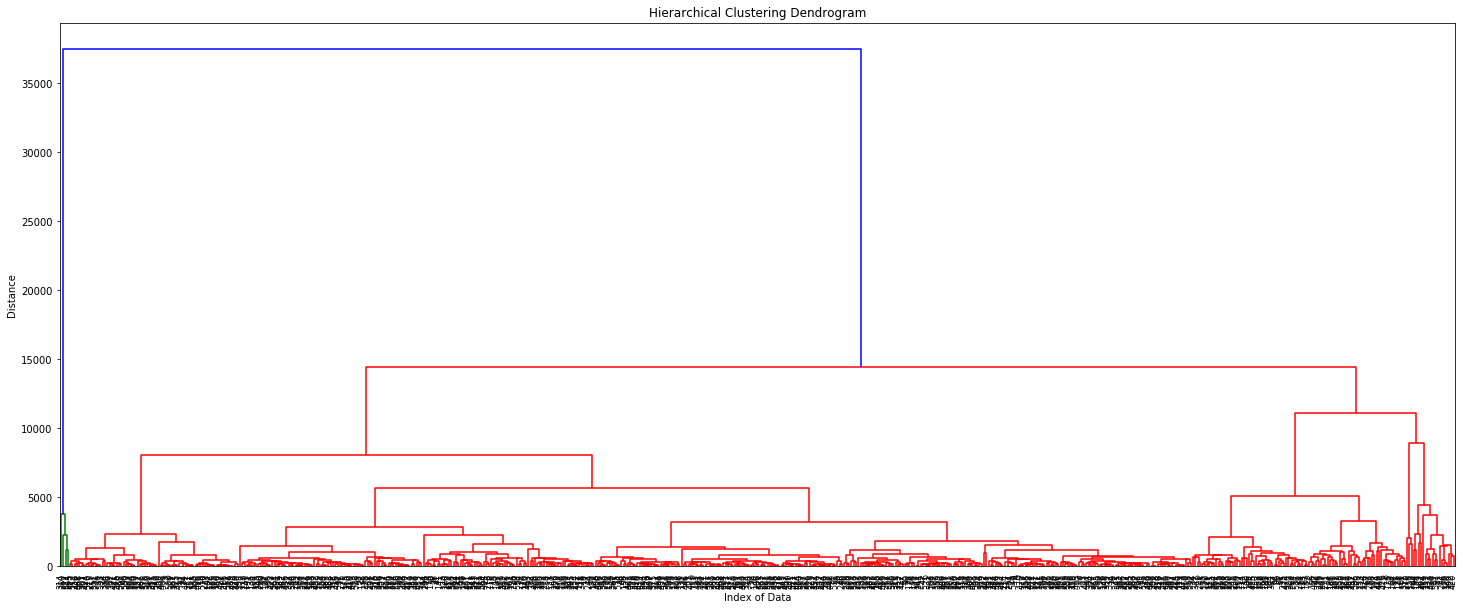

In [72]:
# plot dendrogram
plot_dendrogram('Dendrogram', 'Index', 'Distance', Z, max_d=None, p=None)

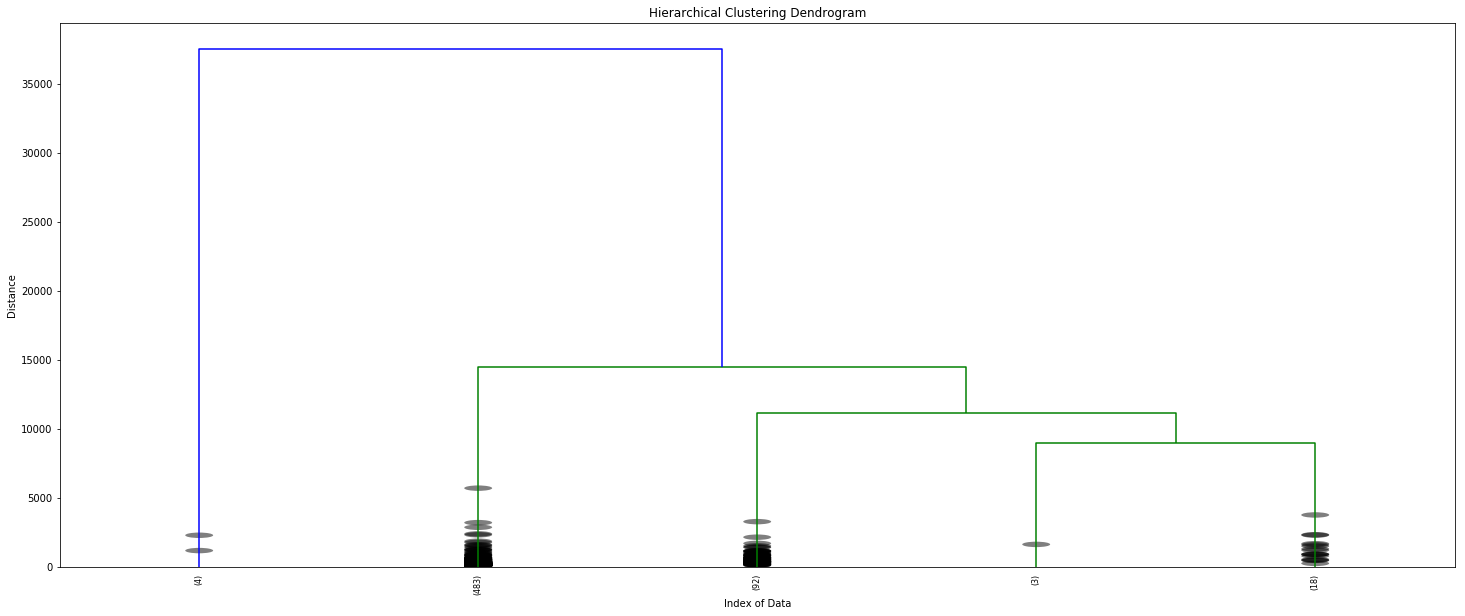

In [74]:
# Dendrogram에 표현할 가지의 개수 정하기 - set p
plot_dendrogram('Dendrogram', 'Index', 'Distance', Z, p=5, max_d=None)

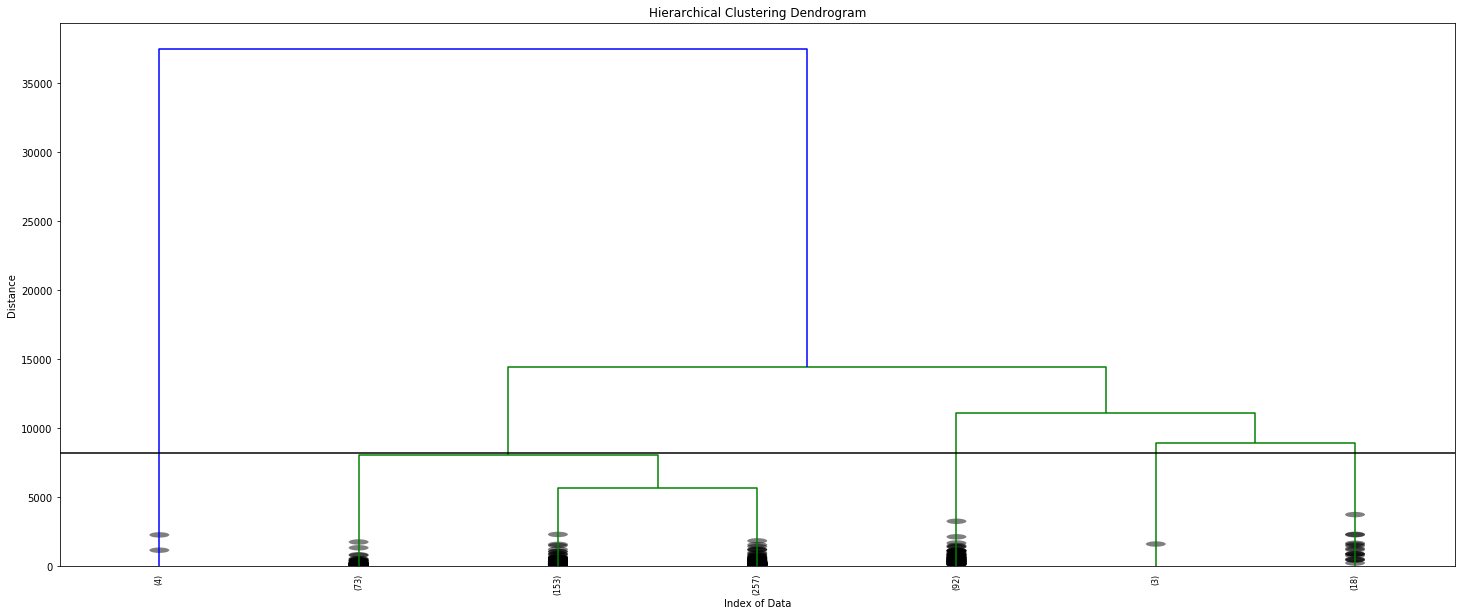

In [78]:
# k를 결정하기 위해, k보다 큰 개수의 p를 가진 dendrogram을 그리고, max_distance를 결정한다.
plot_dendrogram('Dendrogram', 'Index', 'Distance', Z, max_d=8200, p=7)
# max_d

In [ ]:
# max_distance에 해당하는 선을 Dendrogram에 그려서 원하는 k를 표현하기 위한 max_distance를 확정한다.

##### predicted_labels : `scipy.cluster.hierarchy.fcluster`

In [79]:
# import packages
from scipy.cluster.hierarchy import fcluster

In [81]:
# predicted_labels
# Note: This cluster label begins from 1!
predicted_labels = fcluster(Z, 8200, criterion='distance')
predicted_labels

array([2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 5,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 5, 2,
       2, 2, 2, 3, 3, 2, 2, 3, 2, 3, 5, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 5, 2, 2, 2, 3,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 5, 3, 3, 4, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 3,
       3, 5, 3, 3, 2, 5, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2,
       3, 2, 3, 3, 5, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 5, 2, 2, 2, 2,
       3, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 5, 2, 3, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 4, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 2,

In [82]:
# save to result_df
result_df['scipy_hc_labels'] = predicted_labels
result_df

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,...,Fax Machine,Video camera/Handycam,Radio Clock,Deep Freezer,Electirc Kettle,Dish Washing Machine,Kitchen Sink,Floor Polisher,sklearn_hc_labels,scipy_hc_labels
Member id,,,,,,,,,,,,,,,,,,,,,
1010010.0,4.0,3.0,10.0,1.0,4.0,4.0,2.0,4.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
1010020.0,3.0,2.0,10.0,2.0,2.0,4.0,4.0,2.0,1.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2
1014020.0,2.0,3.0,10.0,2.0,4.0,5.0,6.0,4.0,1.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3
1014030.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2
1014190.0,4.0,1.0,10.0,2.0,3.0,4.0,4.0,3.0,1.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
1017020.0,4.0,3.0,10.0,2.0,3.0,4.0,5.0,2.0,1.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3
1017110.0,4.0,2.0,10.0,2.0,4.0,1.0,3.0,2.0,1.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
1017160.0,4.0,3.0,10.0,2.0,2.0,4.0,5.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
1017360.0,4.0,3.0,10.0,2.0,4.0,4.0,6.0,4.0,1.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3


### 3. K-Means
---
##### 3-1. `sklearn.cluster.KMeans`
---
- Parameter
    - `n_cluster` - 클러스터의 개수
- Return : 모든 데이터의 Label

In [83]:
# import packages
from sklearn.cluster import KMeans

In [84]:
# set parameter
n_cluster = 5

In [85]:
# set model
kmeans_model = KMeans(n_clusters=n_cluster)

In [86]:
# fit to model
kmeans_model.fit(X_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [94]:
# predicted_labels
kmeans_model.labels_

array([3, 1, 4, 0, 3, 1, 3, 3, 4, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 0, 0, 3, 4,
       0, 0, 1, 3, 3, 3, 0, 1, 3, 0, 4, 1, 3, 0, 3, 1, 0, 3, 1, 4, 0, 4, 3,
       0, 3, 0, 1, 1, 1, 0, 4, 1, 1, 4, 1, 4, 3, 1, 1, 1, 3, 3, 3, 4, 4, 3,
       1, 3, 3, 3, 0, 1, 0, 0, 3, 1, 0, 0, 4, 1, 0, 0, 1, 3, 4, 0, 1, 3, 4,
       3, 3, 3, 3, 1, 3, 0, 3, 1, 1, 4, 1, 3, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1,
       3, 1, 3, 1, 3, 1, 1, 1, 4, 4, 4, 2, 3, 3, 1, 1, 1, 3, 3, 0, 0, 3, 0,
       3, 4, 1, 1, 3, 3, 1, 3, 0, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 0, 3, 4, 1,
       4, 4, 1, 4, 3, 4, 0, 1, 1, 1, 3, 0, 3, 4, 3, 4, 3, 4, 3, 3, 1, 3, 0,
       1, 1, 4, 1, 4, 3, 1, 1, 0, 3, 1, 3, 3, 0, 1, 3, 3, 4, 4, 3, 3, 3, 0,
       4, 3, 1, 3, 0, 3, 1, 4, 0, 3, 0, 3, 3, 3, 2, 1, 0, 3, 0, 1, 1, 0, 0,
       3, 4, 1, 4, 3, 1, 1, 3, 4, 0, 3, 3, 3, 0, 1, 0, 0, 0, 3, 0, 0, 3, 0,
       1, 1, 3, 1, 1, 4, 3, 3, 0, 3, 1, 1, 3, 1, 3, 3, 3, 2, 4, 0, 3, 1, 3,
       1, 3, 0, 0, 2, 1, 3, 4, 1, 3, 3, 3, 1, 3, 3, 0, 3, 3, 0, 1, 1, 3, 1,
       3, 0,

In [90]:
#kmeans_model.fit_predict(preprocessed_df)
kmeans_model.fit_predict(X_df)

array([3, 1, 4, 0, 3, 1, 3, 3, 4, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 0, 0, 3, 4,
       0, 0, 1, 3, 3, 3, 0, 1, 3, 0, 4, 1, 3, 0, 3, 1, 0, 3, 1, 4, 0, 4, 3,
       0, 3, 0, 1, 1, 1, 0, 4, 1, 1, 4, 1, 4, 3, 1, 1, 1, 3, 3, 3, 4, 4, 3,
       1, 3, 3, 3, 0, 1, 0, 0, 3, 1, 0, 0, 4, 1, 0, 0, 1, 3, 4, 0, 1, 3, 4,
       3, 3, 3, 3, 1, 3, 0, 3, 1, 1, 4, 1, 3, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1,
       3, 1, 3, 1, 3, 1, 1, 1, 4, 4, 4, 2, 3, 3, 1, 1, 1, 3, 3, 0, 0, 3, 0,
       3, 4, 1, 1, 3, 3, 1, 3, 0, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 0, 3, 4, 1,
       4, 4, 1, 4, 3, 4, 0, 1, 1, 1, 3, 0, 3, 4, 3, 4, 3, 4, 3, 3, 1, 3, 0,
       1, 1, 4, 1, 4, 3, 1, 1, 0, 3, 1, 3, 3, 0, 1, 3, 3, 4, 4, 3, 3, 3, 0,
       4, 3, 1, 3, 0, 3, 1, 4, 0, 3, 0, 3, 3, 3, 2, 1, 0, 3, 0, 1, 1, 0, 0,
       3, 4, 1, 4, 3, 1, 1, 3, 4, 0, 3, 3, 3, 0, 1, 0, 0, 0, 3, 0, 0, 3, 0,
       1, 1, 3, 1, 1, 4, 3, 3, 0, 3, 1, 1, 3, 1, 3, 3, 3, 2, 4, 0, 3, 1, 3,
       1, 3, 0, 0, 2, 1, 3, 4, 1, 3, 3, 3, 1, 3, 3, 0, 3, 3, 0, 1, 1, 3, 1,
       3, 0,

In [91]:
# cluster_centers_
kmeans_model.cluster_centers_

array([[  2.18857143e+00,   1.37714286e+00,   5.77714286e+00,
          1.29142857e+00,   3.05142857e+00,   3.39428571e+00,
          2.46857143e+00,   3.60000000e+00,   6.80000000e-01,
          1.41542857e+01,   3.02285714e+00,   1.07714286e+01,
          4.45408571e+03,   1.73428571e+01,   5.61693714e+02,
          1.93712143e+00,   3.11461722e+02,   1.28097851e+01,
          8.99771962e-01,   5.94058970e-02,   4.08221406e-02,
          1.83841307e-01,   1.02007595e-01,   4.18350648e-02,
          3.33568410e-02,   2.90888692e-02,   2.56899571e-02,
          3.09714851e-02,   1.48948583e-02,   5.38314023e-01,
          3.62178182e-01,   4.60252080e-01,   1.11208353e-01,
          6.63613853e-02,   4.49584418e-01,   7.38361993e-02,
          1.05615574e-01,   1.01466880e-01,   2.30391801e-02,
          3.12185553e-02,   3.13911681e-02,   1.09861708e-02,
          3.64211392e-02,   1.08973879e-01,   2.74668374e-02,
          0.00000000e+00,   2.51428571e-01,   1.48571429e-01,
        

In [93]:
# add result to result_df
result_df['kmenas_labels'] = kmeans_model.labels_
result_df

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,...,Video camera/Handycam,Radio Clock,Deep Freezer,Electirc Kettle,Dish Washing Machine,Kitchen Sink,Floor Polisher,sklearn_hc_labels,scipy_hc_labels,kmenas_labels
Member id,,,,,,,,,,,,,,,,,,,,,
1010010.0,4.0,3.0,10.0,1.0,4.0,4.0,2.0,4.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,3
1010020.0,3.0,2.0,10.0,2.0,2.0,4.0,4.0,2.0,1.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,1
1014020.0,2.0,3.0,10.0,2.0,4.0,5.0,6.0,4.0,1.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3,4
1014030.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2,0
1014190.0,4.0,1.0,10.0,2.0,3.0,4.0,4.0,3.0,1.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,3
1017020.0,4.0,3.0,10.0,2.0,3.0,4.0,5.0,2.0,1.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3,1
1017110.0,4.0,2.0,10.0,2.0,4.0,1.0,3.0,2.0,1.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,3
1017160.0,4.0,3.0,10.0,2.0,2.0,4.0,5.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,3
1017360.0,4.0,3.0,10.0,2.0,4.0,4.0,6.0,4.0,1.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3,4


### 4. Analysis
---
#### 4-1. Choose k : Using Silhouette Plot
---

In [ ]:
# import packages
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

In [ ]:
# silhouette_avg

In [ ]:
# silhouette_value of each data

In [ ]:
def plot_silhouette(X_df, labels):
    cluster_labels = sorted(np.unique(labels))
    n_clusters = len(cluster_labels)
    
    plt.figure()

    # axis setting
    ax = plt.gca()
    ax.set_xlim([-0.5, 1])
    ax.set_ylim([0, X_df.shape[0] + (n_clusters + 1) * 10])

    y_lower = 10
    
    silhouette_avg = silhouette_score(X_df, labels)
    print("k : {}".format(n_clusters))
    print("silhouette_avg : {}".format(silhouette_avg))
    data_silhouette_values = silhouette_samples(X_df, labels)

    for i in cluster_labels:
        # 특정 클러스터의 silhouette 값만 추출
        ith_cluster_silhouette_values = data_silhouette_values[labels == i]
        
        # 내림차순으로 정렬
        ith_cluster_silhouette_values.sort()

        # 해당 클러스터의 크기
        size_cluster_i = len(ith_cluster_silhouette_values)
       
        # 클러스터의 silhouette을 표시할 y축 최고값 결정
        y_upper = y_lower + size_cluster_i

        # 색
        color = cm.spectral(float(i) / n_clusters)
        
        # plot silhouette
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # y축에 클러스터 이름 표시
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # 다음 클러스터의 silhouette을 표시할 최저점 조정
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot for k={}".format(n_clusters))
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # silhouette 평균 값을 나타내는 선
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    # y축 값 제거
    ax.set_yticks([])

    plt.show() 

In [ ]:
# plot silhouette for choosing k
# k_candidates
# for loop
    # KMeans model
    # silhouette plot

#### 4-2. groupby()

In [102]:
# group by predicted_labels
result_df.groupby('scipy_hc_labels').mean()

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,...,Fax Machine,Video camera/Handycam,Radio Clock,Deep Freezer,Electirc Kettle,Dish Washing Machine,Kitchen Sink,Floor Polisher,sklearn_hc_labels,kmenas_labels
scipy_hc_labels,,,,,,,,,,,,,,,,,,,,,
1,2.000000,2.000000,9.000000,2.000000,4.000000,3.000000,9.000000,2.250000,1.000000,16.250000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.000000
2,2.412008,1.917184,7.776398,1.689441,3.175983,4.072464,3.732919,3.316770,0.904762,16.732919,...,0.010352,0.016563,0.0,0.0,0.0,0.0,0.0,0.0,2.548654,1.606625
3,2.913043,2.641304,9.652174,1.923913,3.315217,3.847826,5.945652,2.847826,1.032609,17.891304,...,0.054348,0.010870,0.0,0.0,0.0,0.0,0.0,0.0,0.793478,2.271739
4,2.333333,2.333333,10.333333,2.000000,3.333333,5.333333,6.000000,2.333333,1.000000,21.666667,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.000000
5,2.888889,2.500000,10.888889,2.000000,3.500000,4.277778,6.166667,3.333333,1.111111,19.666667,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,4.000000


*Q. 지금까지 진행해온 분석의 문제점은?*

In [98]:
# Hint 1
result_df.groupby('sklearn_hc_labels').mean().iloc[:, :10]
# Problem 1: Categorical records has no meaning in numbers

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index
sklearn_hc_labels,,,,,,,,,,
0,2.795455,2.522727,10.159091,2.000000,3.500000,4.022727,6.522727,3.068182,1.068182,18.363636
1,2.873786,2.582524,9.495146,1.912621,3.320388,3.844660,5.543689,2.873786,1.019417,17.854369
2,2.290043,2.051948,8.311688,1.848485,3.194805,4.714286,3.744589,3.168831,1.008658,19.307359
3,2.664430,2.201342,8.986577,1.892617,3.241611,4.241611,4.778523,3.107383,1.006711,17.328859
4,2.123288,0.684932,3.054795,0.671233,2.890411,1.808219,1.095890,4.301370,0.328767,7.164384


In [99]:
# Hint 2 
X_df.iloc[:10, 11:46]
# Problem 2: Records are not normalized

,Brand Runs,Total Volume,No. of Trans,Value,Trans / Brand Runs,Vol/Tran,Avg. Price,Pur Vol No Promo - %,Pur Vol Promo 6 %,Pur Vol Other Promo %,...,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15,Radio/Transistor with FM
Member id,,,,,,,,,,,,,,,,,,,,,
1010010.0,17.0,8025.0,24.0,818.0,1.411765,334.375000,10.193146,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.028037,0.0,0.130841,0.339564,0.0
1010020.0,25.0,13975.0,40.0,1681.5,1.600000,349.375000,12.032200,0.887299,0.096601,0.016100,...,0.026834,0.016100,0.014311,0.0,0.059034,0.000000,0.0,0.080501,0.000000,0.0
1014020.0,37.0,23100.0,63.0,1950.0,1.702703,366.666667,8.441558,0.941558,0.019481,0.038961,...,0.033550,0.010823,0.008658,0.0,0.000000,0.016234,0.0,0.561688,0.003247,0.0
1014030.0,4.0,1500.0,4.0,114.0,1.000000,375.000000,7.600000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.600000,0.000000,0.0
1014190.0,6.0,8300.0,13.0,591.0,2.166667,638.461538,7.120482,0.614458,0.144578,0.240964,...,0.000000,0.048193,0.000000,0.0,0.000000,0.000000,0.0,0.144578,0.000000,0.0
1017020.0,26.0,18175.0,41.0,1705.5,1.576923,443.292683,9.383769,1.000000,0.000000,0.000000,...,0.000000,0.006878,0.071527,0.0,0.000000,0.000000,0.0,0.066025,0.269601,0.0
1017110.0,17.0,9950.0,26.0,1007.5,1.529412,382.692308,10.125628,0.977387,0.022613,0.000000,...,0.022613,0.007538,0.000000,0.0,0.000000,0.000000,0.0,0.045226,0.103015,0.0
1017160.0,8.0,9300.0,25.0,569.5,3.125000,372.000000,6.123656,0.935484,0.000000,0.064516,...,0.000000,0.000000,0.000000,0.0,0.000000,0.008065,0.0,0.895161,0.032258,0.0
1017360.0,12.0,26490.0,27.0,3113.5,2.250000,981.111111,11.753492,0.898075,0.101925,0.000000,...,0.000000,0.000000,0.015100,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0


In [100]:
# Hint 3 : 현재 변수의 개수
X_df.columns
# Problem 3: Too many variables (= Unncessary data which have no correlation to the result we would like to derive is present)

Index(['SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'CHILD', 'CS',
       'Affluence Index',
       ...
       'Personal/Home Computers', 'Computer Printers', 'Fax Machine',
       'Video camera/Handycam', 'Radio Clock', 'Deep Freezer',
       'Electirc Kettle\t\t', 'Dish Washing Machine', 'Kitchen Sink',
       'Floor Polisher'],
      dtype='object', length=113)

### 5. 실습 : 비누 판매 마케팅 전략 수립을 위한 데이터 분석
---
#### 5-1. More Preprocessing
---
##### 1. pd.get_dummies

In [106]:
# Choose columns of categorical records
want_to_get_dum_cols = ['SEC', 'FEH', 'MT', 'SEX', 'AGE', 'CHILD', 'EDU', 'CS']

In [107]:
# Create dummy file
dummies_df = pd.get_dummies(X_df, columns=want_to_get_dum_cols)
dummies_df

,HS,Affluence Index,No. of Brands,Brand Runs,Total Volume,No. of Trans,Value,Trans / Brand Runs,Vol/Tran,Avg. Price,...,EDU_3.0,EDU_4.0,EDU_5.0,EDU_6.0,EDU_7.0,EDU_8.0,EDU_9.0,CS_0.0,CS_1.0,CS_2.0
Member id,,,,,,,,,,,,,,,,,,,,,
1010010.0,2.0,2.0,3.0,17.0,8025.0,24.0,818.00,1.411765,334.375000,10.193146,...,0,1,0,0,0,0,0,0,1,0
1010020.0,4.0,19.0,5.0,25.0,13975.0,40.0,1681.50,1.600000,349.375000,12.032200,...,0,1,0,0,0,0,0,0,1,0
1014020.0,6.0,23.0,5.0,37.0,23100.0,63.0,1950.00,1.702703,366.666667,8.441558,...,0,0,1,0,0,0,0,0,1,0
1014030.0,0.0,0.0,2.0,4.0,1500.0,4.0,114.00,1.000000,375.000000,7.600000,...,0,0,0,0,0,0,0,1,0,0
1014190.0,4.0,10.0,3.0,6.0,8300.0,13.0,591.00,2.166667,638.461538,7.120482,...,0,1,0,0,0,0,0,0,1,0
1017020.0,5.0,13.0,3.0,26.0,18175.0,41.0,1705.50,1.576923,443.292683,9.383769,...,0,1,0,0,0,0,0,0,1,0
1017110.0,3.0,11.0,4.0,17.0,9950.0,26.0,1007.50,1.529412,382.692308,10.125628,...,0,0,0,0,0,0,0,0,1,0
1017160.0,5.0,0.0,3.0,8.0,9300.0,25.0,569.50,3.125000,372.000000,6.123656,...,0,1,0,0,0,0,0,1,0,0
1017360.0,6.0,17.0,2.0,12.0,26490.0,27.0,3113.50,2.250000,981.111111,11.753492,...,0,1,0,0,0,0,0,0,1,0


##### 2. Scaling

In [110]:
# Choose columns of number records
want_to_norm_cols = X_df.columns[11:45]
want_to_norm_cols

Index(['Brand Runs', 'Total Volume', 'No. of  Trans', 'Value',
       'Trans / Brand Runs', 'Vol/Tran', 'Avg. Price ', 'Pur Vol No Promo - %',
       'Pur Vol Promo 6 %', 'Pur Vol Other Promo %', 'Br. Cd. 57, 144',
       'Br. Cd. 55', 'Br. Cd. 272', 'Br. Cd. 286', 'Br. Cd. 24', 'Br. Cd. 481',
       'Br. Cd. 352', 'Br. Cd. 5', 'Others 999', 'Pr Cat 1', 'Pr Cat 2',
       'Pr Cat 3', 'Pr Cat 4', 'PropCat 5', 'PropCat 6', 'PropCat 7',
       'PropCat 8', 'PropCat 9', 'PropCat 10', 'PropCat 11', 'PropCat 12',
       'PropCat 13', 'PropCat 14', 'PropCat 15'],
      dtype='object')

In [112]:
# Normalize ((x - µ) / 𝜎)
preprocessed_df = dummies_df.copy()
preprocessed_df[want_to_norm_cols] = (preprocessed_df[want_to_norm_cols] - preprocessed_df[want_to_norm_cols].mean()) / preprocessed_df[want_to_norm_cols].std()
preprocessed_df[want_to_norm_cols]

,Brand Runs,Total Volume,No. of Trans,Value,Trans / Brand Runs,Vol/Tran,Avg. Price,Pur Vol No Promo - %,Pur Vol Promo 6 %,Pur Vol Other Promo %,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
Member id,,,,,,,,,,,,,,,,,,,,,
1010010.0,0.120073,-0.500590,-0.410468,-0.588103,-0.462990,-0.324310,-0.438559,0.728027,-0.575347,-0.465256,...,-0.555062,-0.495041,-0.525344,-0.490413,-0.264145,-0.298244,0.829274,-0.261268,-0.021198,3.586695
1010020.0,0.889564,0.265139,0.507634,0.389641,-0.390723,-0.264012,0.052803,-0.215162,0.463515,-0.241597,...,1.531440,-0.357967,-0.419813,-0.262584,-0.264145,0.301285,-0.236281,-0.261268,-0.210415,-0.289959
1014020.0,2.043801,1.439471,1.827405,0.693664,-0.351293,-0.194501,-0.906551,0.238934,-0.365851,0.075979,...,0.173682,-0.323659,-0.454406,-0.352582,-0.264145,-0.298244,0.380680,-0.261268,1.598254,-0.252893
1014030.0,-1.130350,-1.340318,-1.558096,-1.385245,-0.621075,-0.161001,-1.131400,0.728027,-0.575347,-0.465256,...,-0.555062,-0.495041,-0.525344,-0.490413,-0.264145,-0.298244,-0.236281,-0.261268,1.742258,-0.289959
1014190.0,-0.937978,-0.465199,-1.041663,-0.845136,-0.173168,0.898092,-1.259518,-2.498548,0.979469,2.882140,...,-0.555062,-0.495041,-0.209457,-0.490413,-0.264145,-0.298244,-0.236281,-0.261268,0.030437,-0.289959
1017020.0,0.985750,0.805654,0.565015,0.416816,-0.399583,0.113530,-0.654809,0.728027,-0.575347,-0.465256,...,0.040363,-0.495041,-0.480264,0.648264,-0.264145,-0.298244,-0.236281,-0.261268,-0.264827,2.787961
1017110.0,0.120073,-0.252854,-0.295705,-0.373532,-0.417823,-0.130079,-0.456598,0.538780,-0.332163,-0.465256,...,-0.555062,-0.379527,-0.475937,-0.490413,-0.264145,-0.298244,-0.236281,-0.261268,-0.343004,0.886120
1017160.0,-0.745605,-0.336505,-0.353087,-0.869480,0.194756,-0.173061,-1.525852,0.188096,-0.575347,0.430983,...,-0.555062,-0.495041,-0.525344,-0.490413,-0.264145,-0.298244,0.070209,-0.261268,2.851698,0.078317
1017360.0,-0.360859,1.875744,-0.238324,2.011100,-0.141175,2.275515,-0.021663,-0.124978,0.520772,-0.465256,...,1.130106,-0.495041,-0.525344,-0.250027,-0.264145,-0.298244,-0.236281,-0.261268,-0.512998,-0.289959


#### 5-2. 비누 구매 고객 세분화
---
- 구매 행동(구매량, 빈도, 할인에 대한 민감성, 브랜드 충성도), 구매 기반(가격, 구매제의) 등의 변수를 이용하여 군집화하라
- 어떤 군집화 방법을 선택할 것인가? 그 이유는 무엇인가?
- k는 몇 개로 선택할 것인가? 한번에 진행 가능한 마케팅 전략이 2~5개라고 할 때 k의 개수는 타당한가? 

##### Get data sheet

In [1]:
# Import pandas package
import pandas as pd
# Create data frame of customer info
cus_df = pd.read_excel('BathSoap.xlsx', 2, header=2)
# Call data frame
cus_df

,Member id,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
0,1010010.0,4.0,3.0,10.0,1.0,4.0,4.0,2.0,4.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028037,0.000000,0.130841,0.339564
1,1010020.0,3.0,2.0,10.0,2.0,2.0,4.0,4.0,2.0,1.0,...,0.347048,0.026834,0.016100,0.014311,0.000000,0.059034,0.000000,0.000000,0.080501,0.000000
2,1014020.0,2.0,3.0,10.0,2.0,4.0,5.0,6.0,4.0,1.0,...,0.121212,0.033550,0.010823,0.008658,0.000000,0.000000,0.016234,0.000000,0.561688,0.003247
3,1014030.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000
4,1014190.0,4.0,1.0,10.0,2.0,3.0,4.0,4.0,3.0,1.0,...,0.000000,0.000000,0.048193,0.000000,0.000000,0.000000,0.000000,0.000000,0.144578,0.000000
5,1017020.0,4.0,3.0,10.0,2.0,3.0,4.0,5.0,2.0,1.0,...,0.099037,0.000000,0.006878,0.071527,0.000000,0.000000,0.000000,0.000000,0.066025,0.269601
6,1017110.0,4.0,2.0,10.0,2.0,4.0,1.0,3.0,2.0,1.0,...,0.000000,0.022613,0.007538,0.000000,0.000000,0.000000,0.000000,0.000000,0.045226,0.103015
7,1017160.0,4.0,3.0,10.0,2.0,2.0,4.0,5.0,3.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008065,0.000000,0.895161,0.032258
8,1017360.0,4.0,3.0,10.0,2.0,4.0,4.0,6.0,4.0,1.0,...,0.280294,0.000000,0.000000,0.015100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,1017460.0,1.0,3.0,5.0,1.0,4.0,7.0,3.0,4.0,1.0,...,0.462777,0.150905,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120724,0.026828


In [2]:
# Remove NaN
no_nan_df = cus_df[cus_df.isnull().sum(axis=1) == 0]
no_nan_df

,Member id,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
0,1010010.0,4.0,3.0,10.0,1.0,4.0,4.0,2.0,4.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028037,0.000000,0.130841,0.339564
1,1010020.0,3.0,2.0,10.0,2.0,2.0,4.0,4.0,2.0,1.0,...,0.347048,0.026834,0.016100,0.014311,0.000000,0.059034,0.000000,0.000000,0.080501,0.000000
2,1014020.0,2.0,3.0,10.0,2.0,4.0,5.0,6.0,4.0,1.0,...,0.121212,0.033550,0.010823,0.008658,0.000000,0.000000,0.016234,0.000000,0.561688,0.003247
3,1014030.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000
4,1014190.0,4.0,1.0,10.0,2.0,3.0,4.0,4.0,3.0,1.0,...,0.000000,0.000000,0.048193,0.000000,0.000000,0.000000,0.000000,0.000000,0.144578,0.000000
5,1017020.0,4.0,3.0,10.0,2.0,3.0,4.0,5.0,2.0,1.0,...,0.099037,0.000000,0.006878,0.071527,0.000000,0.000000,0.000000,0.000000,0.066025,0.269601
6,1017110.0,4.0,2.0,10.0,2.0,4.0,1.0,3.0,2.0,1.0,...,0.000000,0.022613,0.007538,0.000000,0.000000,0.000000,0.000000,0.000000,0.045226,0.103015
7,1017160.0,4.0,3.0,10.0,2.0,2.0,4.0,5.0,3.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008065,0.000000,0.895161,0.032258
8,1017360.0,4.0,3.0,10.0,2.0,4.0,4.0,6.0,4.0,1.0,...,0.280294,0.000000,0.000000,0.015100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,1017460.0,1.0,3.0,5.0,1.0,4.0,7.0,3.0,4.0,1.0,...,0.462777,0.150905,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120724,0.026828


In [3]:
# Remove unwanted columns
drop_cols = ['Affluence Index']
sel_df = no_nan_df.drop(drop_cols, axis=1)
sel_df

,Member id,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
0,1010010.0,4.0,3.0,10.0,1.0,4.0,4.0,2.0,4.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028037,0.000000,0.130841,0.339564
1,1010020.0,3.0,2.0,10.0,2.0,2.0,4.0,4.0,2.0,1.0,...,0.347048,0.026834,0.016100,0.014311,0.000000,0.059034,0.000000,0.000000,0.080501,0.000000
2,1014020.0,2.0,3.0,10.0,2.0,4.0,5.0,6.0,4.0,1.0,...,0.121212,0.033550,0.010823,0.008658,0.000000,0.000000,0.016234,0.000000,0.561688,0.003247
3,1014030.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000
4,1014190.0,4.0,1.0,10.0,2.0,3.0,4.0,4.0,3.0,1.0,...,0.000000,0.000000,0.048193,0.000000,0.000000,0.000000,0.000000,0.000000,0.144578,0.000000
5,1017020.0,4.0,3.0,10.0,2.0,3.0,4.0,5.0,2.0,1.0,...,0.099037,0.000000,0.006878,0.071527,0.000000,0.000000,0.000000,0.000000,0.066025,0.269601
6,1017110.0,4.0,2.0,10.0,2.0,4.0,1.0,3.0,2.0,1.0,...,0.000000,0.022613,0.007538,0.000000,0.000000,0.000000,0.000000,0.000000,0.045226,0.103015
7,1017160.0,4.0,3.0,10.0,2.0,2.0,4.0,5.0,3.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008065,0.000000,0.895161,0.032258
8,1017360.0,4.0,3.0,10.0,2.0,4.0,4.0,6.0,4.0,1.0,...,0.280294,0.000000,0.000000,0.015100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,1017460.0,1.0,3.0,5.0,1.0,4.0,7.0,3.0,4.0,1.0,...,0.462777,0.150905,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120724,0.026828


##### 변수 선택
---

In [4]:
# Choose columns of categorical records
want_to_get_dum_cols = ['SEC', 'FEH', 'MT', 'SEX', 'AGE', 'CHILD', 'EDU', 'CS']
# Create dummy file
dummies_df = pd.get_dummies(sel_df, columns=want_to_get_dum_cols)
dummies_df

,Member id,HS,No. of Brands,Brand Runs,Total Volume,No. of Trans,Value,Trans / Brand Runs,Vol/Tran,Avg. Price,...,EDU_3.0,EDU_4.0,EDU_5.0,EDU_6.0,EDU_7.0,EDU_8.0,EDU_9.0,CS_0.0,CS_1.0,CS_2.0
0,1010010.0,2.0,3.0,17.0,8025.0,24.0,818.00,1.411765,334.375000,10.193146,...,0,1,0,0,0,0,0,0,1,0
1,1010020.0,4.0,5.0,25.0,13975.0,40.0,1681.50,1.600000,349.375000,12.032200,...,0,1,0,0,0,0,0,0,1,0
2,1014020.0,6.0,5.0,37.0,23100.0,63.0,1950.00,1.702703,366.666667,8.441558,...,0,0,1,0,0,0,0,0,1,0
3,1014030.0,0.0,2.0,4.0,1500.0,4.0,114.00,1.000000,375.000000,7.600000,...,0,0,0,0,0,0,0,1,0,0
4,1014190.0,4.0,3.0,6.0,8300.0,13.0,591.00,2.166667,638.461538,7.120482,...,0,1,0,0,0,0,0,0,1,0
5,1017020.0,5.0,3.0,26.0,18175.0,41.0,1705.50,1.576923,443.292683,9.383769,...,0,1,0,0,0,0,0,0,1,0
6,1017110.0,3.0,4.0,17.0,9950.0,26.0,1007.50,1.529412,382.692308,10.125628,...,0,0,0,0,0,0,0,0,1,0
7,1017160.0,5.0,3.0,8.0,9300.0,25.0,569.50,3.125000,372.000000,6.123656,...,0,1,0,0,0,0,0,1,0,0
8,1017360.0,6.0,2.0,12.0,26490.0,27.0,3113.50,2.250000,981.111111,11.753492,...,0,1,0,0,0,0,0,0,1,0
9,1017460.0,3.0,4.0,13.0,7455.0,18.0,990.50,1.384615,414.166667,13.286385,...,0,0,0,0,1,0,0,0,1,0


In [5]:
# Choose columns of number records
want_to_norm_cols = sel_df.columns[10:45]
want_to_norm_cols

Index(['No. of Brands', 'Brand Runs', 'Total Volume', 'No. of  Trans', 'Value',
       'Trans / Brand Runs', 'Vol/Tran', 'Avg. Price ', 'Pur Vol No Promo - %',
       'Pur Vol Promo 6 %', 'Pur Vol Other Promo %', 'Br. Cd. 57, 144',
       'Br. Cd. 55', 'Br. Cd. 272', 'Br. Cd. 286', 'Br. Cd. 24', 'Br. Cd. 481',
       'Br. Cd. 352', 'Br. Cd. 5', 'Others 999', 'Pr Cat 1', 'Pr Cat 2',
       'Pr Cat 3', 'Pr Cat 4', 'PropCat 5', 'PropCat 6', 'PropCat 7',
       'PropCat 8', 'PropCat 9', 'PropCat 10', 'PropCat 11', 'PropCat 12',
       'PropCat 13', 'PropCat 14', 'PropCat 15'],
      dtype='object')

In [6]:
# Normalize ((x - µ) / 𝜎)
preprocessed_df = dummies_df.copy()
preprocessed_df[want_to_norm_cols] = (preprocessed_df[want_to_norm_cols] - preprocessed_df[want_to_norm_cols].mean()) / preprocessed_df[want_to_norm_cols].std()
preprocessed_df[want_to_norm_cols]

,No. of Brands,Brand Runs,Total Volume,No. of Trans,Value,Trans / Brand Runs,Vol/Tran,Avg. Price,Pur Vol No Promo - %,Pur Vol Promo 6 %,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
0,-0.403028,0.120073,-0.500590,-0.410468,-0.588103,-0.462990,-0.324310,-0.438559,0.728027,-0.575347,...,-0.555062,-0.495041,-0.525344,-0.490413,-0.264145,-0.298244,0.829274,-0.261268,-0.021198,3.586695
1,0.863028,0.889564,0.265139,0.507634,0.389641,-0.390723,-0.264012,0.052803,-0.215162,0.463515,...,1.531440,-0.357967,-0.419813,-0.262584,-0.264145,0.301285,-0.236281,-0.261268,-0.210415,-0.289959
2,0.863028,2.043801,1.439471,1.827405,0.693664,-0.351293,-0.194501,-0.906551,0.238934,-0.365851,...,0.173682,-0.323659,-0.454406,-0.352582,-0.264145,-0.298244,0.380680,-0.261268,1.598254,-0.252893
3,-1.036056,-1.130350,-1.340318,-1.558096,-1.385245,-0.621075,-0.161001,-1.131400,0.728027,-0.575347,...,-0.555062,-0.495041,-0.525344,-0.490413,-0.264145,-0.298244,-0.236281,-0.261268,1.742258,-0.289959
4,-0.403028,-0.937978,-0.465199,-1.041663,-0.845136,-0.173168,0.898092,-1.259518,-2.498548,0.979469,...,-0.555062,-0.495041,-0.209457,-0.490413,-0.264145,-0.298244,-0.236281,-0.261268,0.030437,-0.289959
5,-0.403028,0.985750,0.805654,0.565015,0.416816,-0.399583,0.113530,-0.654809,0.728027,-0.575347,...,0.040363,-0.495041,-0.480264,0.648264,-0.264145,-0.298244,-0.236281,-0.261268,-0.264827,2.787961
6,0.230000,0.120073,-0.252854,-0.295705,-0.373532,-0.417823,-0.130079,-0.456598,0.538780,-0.332163,...,-0.555062,-0.379527,-0.475937,-0.490413,-0.264145,-0.298244,-0.236281,-0.261268,-0.343004,0.886120
7,-0.403028,-0.745605,-0.336505,-0.353087,-0.869480,0.194756,-0.173061,-1.525852,0.188096,-0.575347,...,-0.555062,-0.495041,-0.525344,-0.490413,-0.264145,-0.298244,0.070209,-0.261268,2.851698,0.078317
8,-1.036056,-0.360859,1.875744,-0.238324,2.011100,-0.141175,2.275515,-0.021663,-0.124978,0.520772,...,1.130106,-0.495041,-0.525344,-0.250027,-0.264145,-0.298244,-0.236281,-0.261268,-0.512998,-0.289959
9,0.230000,-0.264673,-0.573945,-0.754756,-0.392781,-0.473414,-0.003555,0.387898,0.728027,-0.575347,...,2.227214,0.275829,-0.525344,-0.490413,-0.264145,-0.298244,-0.236281,-0.261268,-0.059224,0.016320


##### 방법 선정
---

In [16]:
# import packages
from sklearn.cluster import KMeans

In [17]:
# set parameter
n_cluster = 7

In [18]:
# set model
kmeans_model = KMeans(n_clusters=n_cluster)

In [19]:
# fit to model
kmeans_model.fit(preprocessed_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
# add result to result_df
result_df = sel_df.copy()
result_df['kmeans_labels'] = kmeans_model.labels_
result_df

,Member id,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,...,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15,kmeans_labels
0,1010010.0,4.0,3.0,10.0,1.0,4.0,4.0,2.0,4.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.028037,0.000000,0.130841,0.339564,3
1,1010020.0,3.0,2.0,10.0,2.0,2.0,4.0,4.0,2.0,1.0,...,0.026834,0.016100,0.014311,0.000000,0.059034,0.000000,0.000000,0.080501,0.000000,3
2,1014020.0,2.0,3.0,10.0,2.0,4.0,5.0,6.0,4.0,1.0,...,0.033550,0.010823,0.008658,0.000000,0.000000,0.016234,0.000000,0.561688,0.003247,3
3,1014030.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000,3
4,1014190.0,4.0,1.0,10.0,2.0,3.0,4.0,4.0,3.0,1.0,...,0.000000,0.048193,0.000000,0.000000,0.000000,0.000000,0.000000,0.144578,0.000000,3
5,1017020.0,4.0,3.0,10.0,2.0,3.0,4.0,5.0,2.0,1.0,...,0.000000,0.006878,0.071527,0.000000,0.000000,0.000000,0.000000,0.066025,0.269601,3
6,1017110.0,4.0,2.0,10.0,2.0,4.0,1.0,3.0,2.0,1.0,...,0.022613,0.007538,0.000000,0.000000,0.000000,0.000000,0.000000,0.045226,0.103015,3
7,1017160.0,4.0,3.0,10.0,2.0,2.0,4.0,5.0,3.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.008065,0.000000,0.895161,0.032258,3
8,1017360.0,4.0,3.0,10.0,2.0,4.0,4.0,6.0,4.0,1.0,...,0.000000,0.000000,0.015100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
9,1017460.0,1.0,3.0,5.0,1.0,4.0,7.0,3.0,4.0,1.0,...,0.150905,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120724,0.026828,3


In [21]:
drop_cols = ['Member id']
new_res_df = result_df.drop(drop_cols, axis=1)
new_res_df.groupby('kmeans_labels').mean()

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,No. of Brands,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
kmeans_labels,,,,,,,,,,,,,,,,,,,,,
0,1.634615,1.692308,6.740385,1.567308,2.855769,4.548077,3.278846,3.384615,0.788462,3.625000,...,0.083341,0.115222,0.146618,0.031935,0.035000,0.028278,0.014212,0.026599,0.020637,0.024726
1,3.356322,2.482759,9.137931,1.827586,3.000000,3.471264,4.689655,2.977011,0.988506,3.413793,...,0.128791,0.072548,0.037148,0.040437,0.012416,0.018663,0.002173,0.035405,0.238122,0.012652
2,2.589744,2.294872,9.051282,1.794872,2.948718,4.384615,4.192308,3.217949,1.000000,3.910256,...,0.125911,0.099462,0.066914,0.026702,0.012356,0.033008,0.003967,0.011430,0.071521,0.030182
3,3.555556,2.125000,8.652778,1.638889,3.138889,2.583333,4.500000,3.361111,0.847222,3.208333,...,0.047851,0.067255,0.037942,0.014439,0.007265,0.022556,0.008787,0.002565,0.369210,0.037899
4,3.044444,2.344444,8.855556,1.833333,3.555556,3.533333,4.655556,3.111111,0.988889,3.455556,...,0.095641,0.088580,0.035474,0.037998,0.020165,0.021387,0.003402,0.012420,0.215565,0.007551
5,1.663866,1.605042,7.218487,1.722689,3.512605,4.873950,3.983193,3.302521,0.949580,3.966387,...,0.068169,0.107432,0.107338,0.026169,0.023384,0.046304,0.004203,0.046552,0.044752,0.039281
6,2.160000,2.060000,8.520000,1.860000,3.520000,4.500000,4.440000,3.260000,1.000000,3.780000,...,0.110714,0.129876,0.113836,0.039758,0.026893,0.028443,0.006296,0.027646,0.042747,0.022595


##### k 선정
---

In [3]:
# Choose k

#### 5-3. 타겟 클러스터 선정 및 마케팅 기획
---
* 분석된 세분화에서 두 개의 클러스터를 선정하고, 그 집단의 특성에 대해 분석하시오.
* 선정한 두 클러스터에 대한 마케팅 전략을 수립하시오.

#### 클러스터 선정 및 분석
---


In [ ]:
# Analysis

#### 마케팅 전략
---